In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/average-monthly-surface-temperature.csv')

df.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [3]:
# Переименование столбцов
df = df.rename(columns={
    'Entity': 'Country',
    'year': 'Year',
    'Average surface temperature': 'Daily average temp',
    'Average surface temperature.1': 'Yearly average temp'
})

df = df.drop(columns=['Code'])

# Преобразование столбца Day в формат datetime
df['Day'] = pd.to_datetime(df['Day'])
df['Month'] = df['Day'].dt.month

print(df.head())

       Country  Year        Day  Daily average temp  Yearly average temp  \
0  Afghanistan  1940 1940-01-15           -2.032494            11.327695   
1  Afghanistan  1940 1940-02-15           -0.733503            11.327695   
2  Afghanistan  1940 1940-03-15            1.999134            11.327695   
3  Afghanistan  1940 1940-04-15           10.199754            11.327695   
4  Afghanistan  1940 1940-05-15           17.942135            11.327695   

   Month  
0      1  
1      2  
2      3  
3      4  
4      5  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Country              198900 non-null  object        
 1   Year                 198900 non-null  int64         
 2   Day                  198900 non-null  datetime64[ns]
 3   Daily average temp   198900 non-null  float64       
 4   Yearly average temp  198900 non-null  float64       
 5   Month                198900 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 8.3+ MB


Матрица корреляции:
                             Year  Daily average temp  Yearly average temp  \
Year                 1.000000e+00            0.048716         5.730662e-02   
Daily average temp   4.871562e-02            1.000000         8.500872e-01   
Yearly average temp  5.730662e-02            0.850087         1.000000e+00   
Month                9.138999e-17            0.071510        -3.245324e-16   

                            Month  
Year                 9.138999e-17  
Daily average temp   7.150981e-02  
Yearly average temp -3.245324e-16  
Month                1.000000e+00  


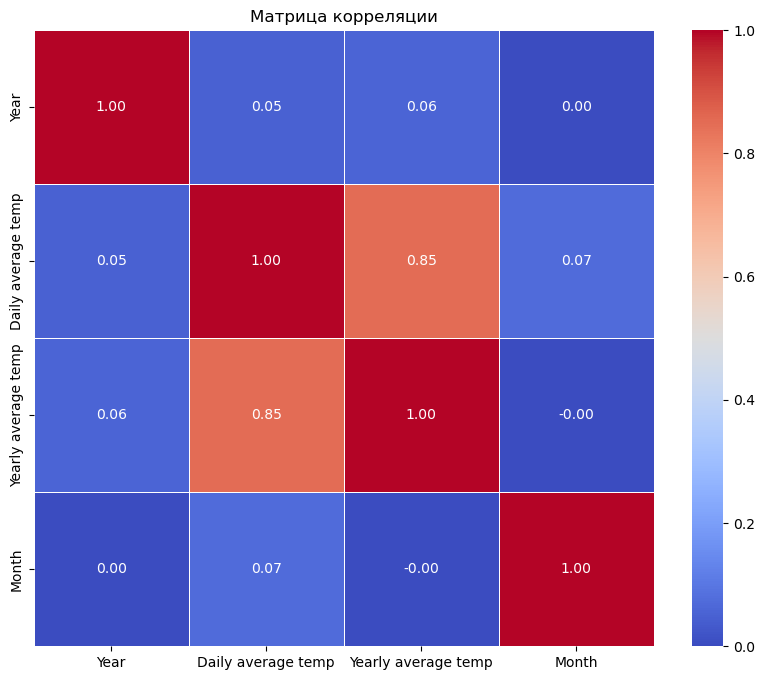

In [5]:
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Вычисляем матрицу корреляции
correlation_matrix = numeric_columns.corr()

# Выводим матрицу корреляции в текстовом виде
print("Матрица корреляции:")
print(correlation_matrix)

# Визуализация матрицы корреляции с помощью heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()

Матрица корреляции для Беларуси:
                             Year  Daily average temp  Yearly average temp  \
Year                 1.000000e+00            0.095590         7.074771e-01   
Daily average temp   9.558994e-02            1.000000         1.351138e-01   
Yearly average temp  7.074771e-01            0.135114         1.000000e+00   
Month                3.358924e-16            0.238239         1.158775e-16   

                            Month  
Year                 3.358924e-16  
Daily average temp   2.382389e-01  
Yearly average temp  1.158775e-16  
Month                1.000000e+00  


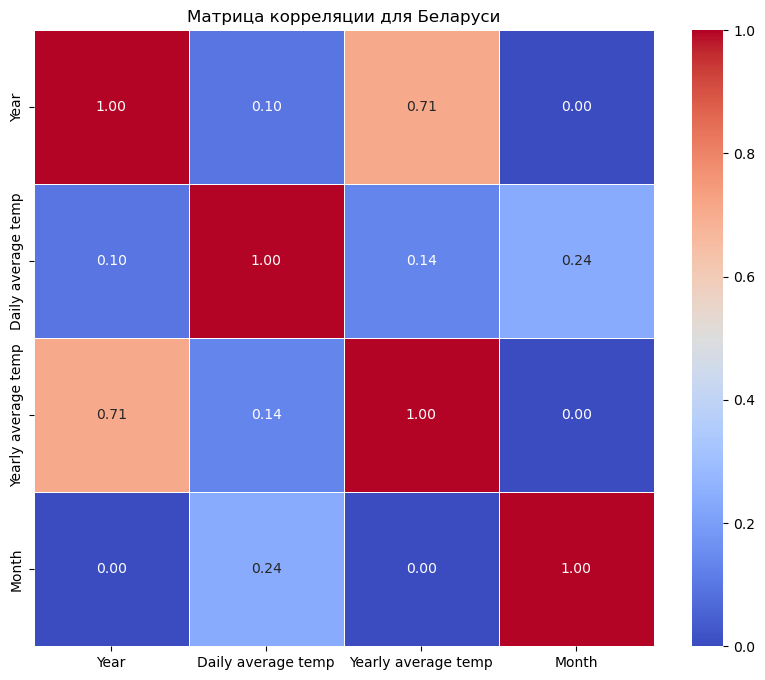

In [6]:
# Фильтрация данных для Беларуси
df_belarus = df[df['Country'] == 'Belarus']

# Выбираем только числовые столбцы
numeric_columns_belarus = df_belarus.select_dtypes(include=['float64', 'int64', 'int32'])

# Вычисляем матрицу корреляции
correlation_matrix_belarus = numeric_columns_belarus.corr()

# Выводим матрицу корреляции в текстовом виде
print("Матрица корреляции для Беларуси:")
print(correlation_matrix_belarus)

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_belarus, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Матрица корреляции для Беларуси")
plt.show()

In [7]:
# Вычисление межквартильного размаха
Q1 = df_belarus['Daily average temp'].quantile(0.25)
Q3 = df_belarus['Daily average temp'].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers = df_belarus[(df_belarus['Daily average temp'] < lower_bound) | 
                      (df_belarus['Daily average temp'] > upper_bound)]
print("Выбросы в данных:")
print(outliers)

Выбросы в данных:
Empty DataFrame
Columns: [Country, Year, Day, Daily average temp, Yearly average temp, Month]
Index: []


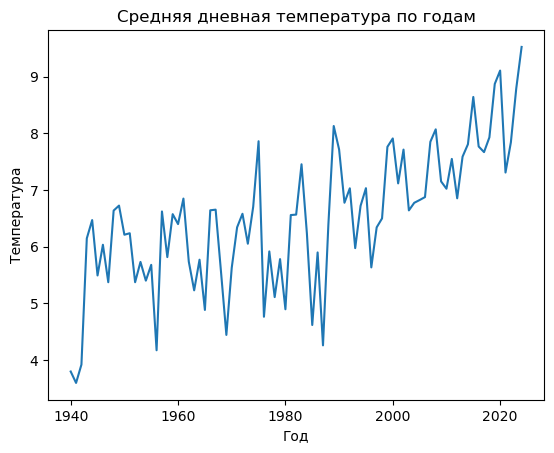

In [8]:
# Средняя температура по годам
yearly_avg_temp = df_belarus.groupby('Year')['Daily average temp'].mean()

# Построение графика
yearly_avg_temp.plot(kind='line', title='Средняя дневная температура по годам', ylabel='Температура', xlabel='Год')
plt.show()

In [9]:
# Сортируем данные по дате
df = df.sort_values(by=["Country", "Day"])

# Лаги для температуры (например, за последние 7 дней)
for lag in range(1, 8):  # Лаги на 7 дней назад
    df[f'Temp_Lag_{lag}'] = df.groupby('Country')['Daily average temp'].shift(lag)

# Удаляем строки с NaN (из-за лагов)
df = df.dropna()

# Целевая переменная: прогноз температуры следующего дня
df['Target'] = df.groupby('Country')['Daily average temp'].shift(-1)

# Удаляем строки с NaN (из-за сдвига цели)
df = df.dropna()

# Выбираем признаки (включая лаги) и целевую переменную
X = df.drop(columns=['Country', 'Day', 'Daily average temp', 'Yearly average temp', 'Target'])
y = df['Target']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Масштабируем целевую переменную
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

In [10]:
def evaluate_model(y_true, y_pred, model_name):
    """Функция для вычисления метрик"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"=== {model_name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² (R-squared): {r2:.4f}")
    print("==============================\n")

In [11]:
from sklearn.linear_model import LinearRegression

# Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Оценка линейной регрессии
evaluate_model(y_test, y_pred_lr, "Linear Regression")

=== Linear Regression ===
Mean Absolute Error (MAE): 1.8643
Mean Squared Error (MSE): 6.3660
Root Mean Squared Error (RMSE): 2.5231
R² (R-squared): 0.9370



In [12]:
from catboost import CatBoostRegressor

# CatBoost
catboost_model = CatBoostRegressor(verbose=0, random_seed=42)
catboost_model.fit(X_train, y_train)  # CatBoost автоматически работает с немасштабированными данными
y_pred_catboost = catboost_model.predict(X_test)

# Оценка CatBoost
evaluate_model(y_test, y_pred_catboost, "CatBoost")

=== CatBoost ===
Mean Absolute Error (MAE): 1.4097
Mean Squared Error (MSE): 3.8360
Root Mean Squared Error (RMSE): 1.9586
R² (R-squared): 0.9621



In [13]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Оценка Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

=== Random Forest ===
Mean Absolute Error (MAE): 1.4346
Mean Squared Error (MSE): 4.1135
Root Mean Squared Error (RMSE): 2.0282
R² (R-squared): 0.9593



In [14]:
import lightgbm as lgb

# Gradient Boosting (LightGBM)
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lgb, "LightGBM")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 157872, number of used features: 9
[LightGBM] [Info] Start training from score 18.087987
=== LightGBM ===
Mean Absolute Error (MAE): 1.5546
Mean Squared Error (MSE): 4.8812
Root Mean Squared Error (RMSE): 2.2093
R² (R-squared): 0.9517



=== MLPRegressor ===
Mean Absolute Error (MAE): 1.4263
Mean Squared Error (MSE): 3.8321
Root Mean Squared Error (RMSE): 1.9576
R² (R-squared): 0.9621



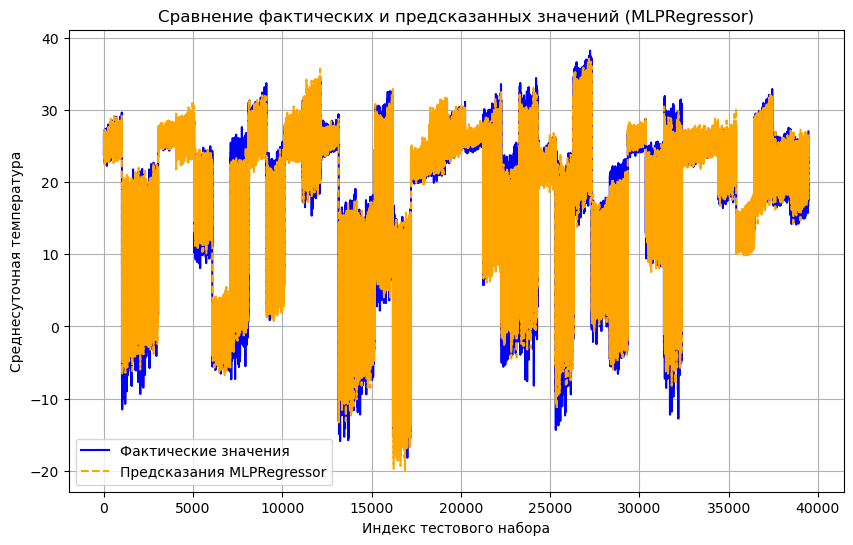

In [15]:
# (многослойный перцептрон для регрессии) из библиотеки scikit-learn. 
# Это нейронная сеть, которая подходит для работы с временными рядами, после предварительной обработки данных (например, создания окон).

# Почему MLPRegressor?
# Нелинейные зависимости: MLP может моделировать сложные нелинейные зависимости в данных.
# Гибкость: Легко настраивается для временных рядов.
# Различие от других моделей: В отличие от деревьев решений и градиентного бустинга, MLP использует подход нейросетевого обучения.

from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Два скрытых слоя с 64 и 32 нейронами
    activation='relu',  # Активационная функция ReLU
    solver='adam',  # Оптимизатор Adam
    learning_rate='adaptive',  # Адаптивная скорость обучения
    max_iter=500,  # Максимальное количество итераций
    random_state=42
)

# Обучение модели
mlp_model.fit(X_train_scaled, y_train_scaled)

# Предсказание на тестовой выборке
y_pred_scaled = mlp_model.predict(X_test_scaled)

# Преобразуем предсказания обратно в исходный масштаб
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Оценка модели
evaluate_model(y_test, y_pred, "MLPRegressor")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Фактические значения', color='blue')
plt.plot(y_pred, label='Предсказания MLPRegressor', color='orange', linestyle='--')
plt.xlabel('Индекс тестового набора')
plt.ylabel('Среднесуточная температура')
plt.title('Сравнение фактических и предсказанных значений (MLPRegressor)')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 157872, number of used features: 9
[LightGBM] [Info] Start training from score 18.087987
MAE: 1.4037
MSE: 3.9257
R²: 0.9612


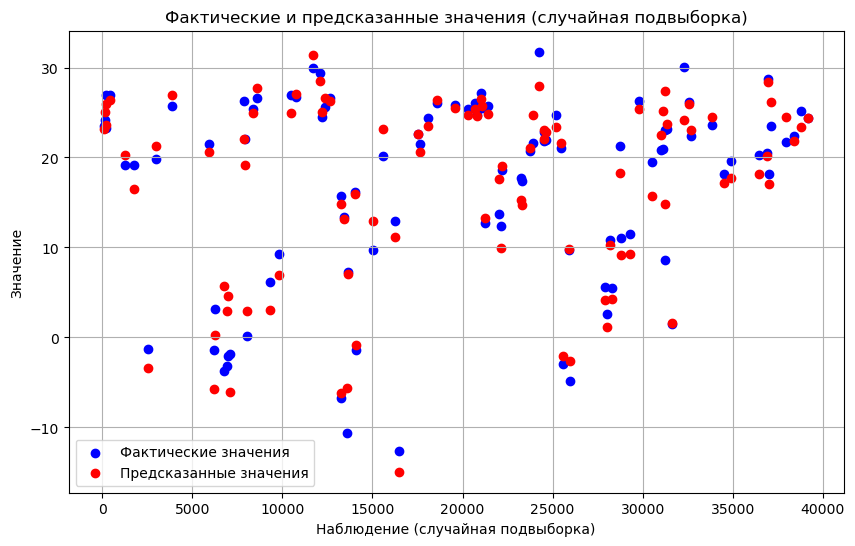

In [16]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

regressor1 = lgb_model
regressor2 = catboost_model
regressor3 = rf_model
regressor4 = XGBRegressor(random_state=42, verbosity=0)

# Определение ансамбля регрессоров (VotingRegressor)
voting_regressor = VotingRegressor(estimators=[
    ('lgb', regressor1),
    ('catboost', regressor2),
    ('rf', regressor3),
    ('xgb', regressor4)
])

# Обучение ансамбля регрессоров
voting_regressor.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = voting_regressor.predict(X_test_scaled)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Построение графика для случайной подвыборки
sample_size = 100
indices = np.random.choice(len(y_test), size=sample_size, replace=False)

# Преобразование y_test и y_pred в numpy
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(indices, y_test_np[indices], color='blue', label='Фактические значения')
plt.scatter(indices, y_pred_np[indices], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение (случайная подвыборка)')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (случайная подвыборка)')
plt.legend()
plt.grid(True)
plt.show()

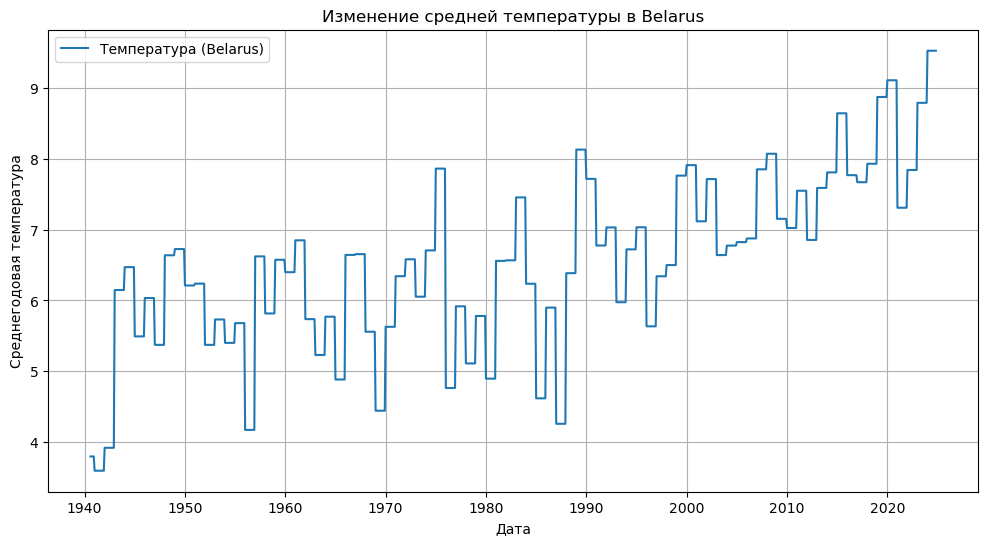

In [17]:
df = df.sort_values(by=['Country', 'Year'])

# Пример: Визуализация временного ряда для конкретной страны
country_name = "Belarus"
country_data = df[df['Country'] == country_name]

# Создание временного индекса с использованием .loc для безопасной модификации
country_data = df.loc[df['Country'] == country_name].copy()  # Создаем копию, чтобы избежать дальнейших предупреждений
country_data['Date'] = pd.to_datetime(country_data[['Year', 'Month']].assign(DAY=1))
country_data = country_data.set_index('Date').sort_index()

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(country_data['Yearly average temp'], label=f"Температура ({country_name})")
plt.title(f"Изменение средней температуры в {country_name}")
plt.xlabel("Дата")
plt.ylabel("Среднегодовая температура")
plt.legend()
plt.grid(True)
plt.show()

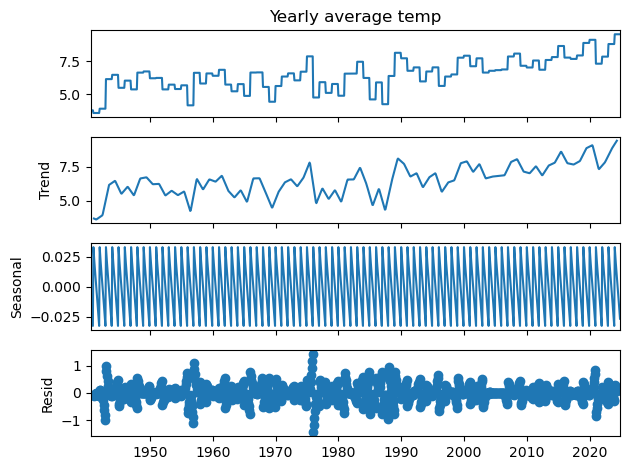

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(country_data['Yearly average temp'], model='additive', period=12)
decomposition.plot()
plt.show()

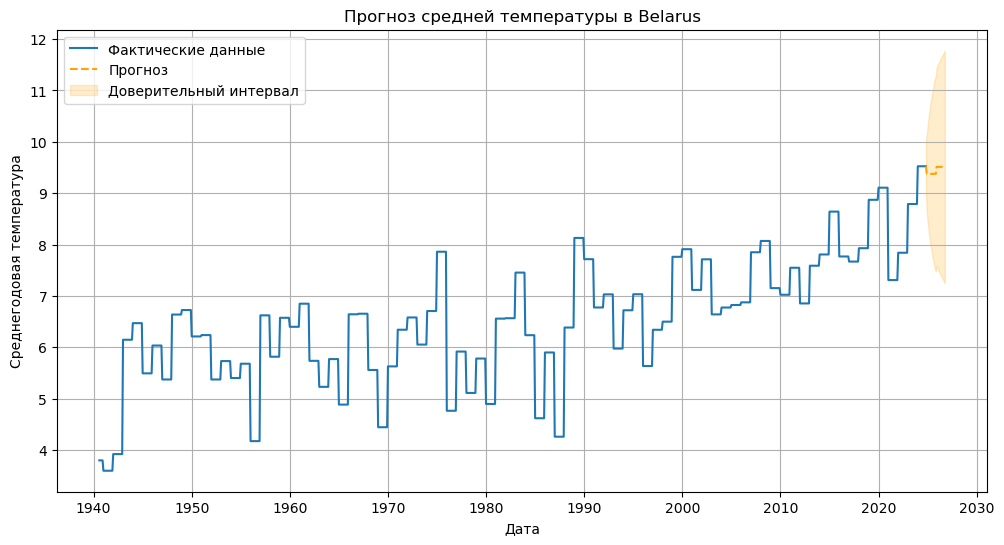

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Убедимся, что индекс имеет частоту
country_data = country_data.asfreq('MS')

# Обучение модели SARIMA
model = SARIMAX(country_data['Yearly average temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)  # Отключение логов оптимизации

# Прогноз на 24 месяца вперёд
forecast = results.get_forecast(steps=24)
forecast_index = pd.date_range(country_data.index[-1], periods=24, freq="MS")
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(country_data['Yearly average temp'], label="Фактические данные")
plt.plot(forecast_index, forecast_values, label="Прогноз", linestyle="--", color="orange")
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0],  # Нижняя граница
                 confidence_intervals.iloc[:, 1],  # Верхняя граница
                 color='orange', alpha=0.2, label="Доверительный интервал")
plt.title(f"Прогноз средней температуры в {country_name}")
plt.xlabel("Дата")
plt.ylabel("Среднегодовая температура")
plt.legend()
plt.grid(True)
plt.show()

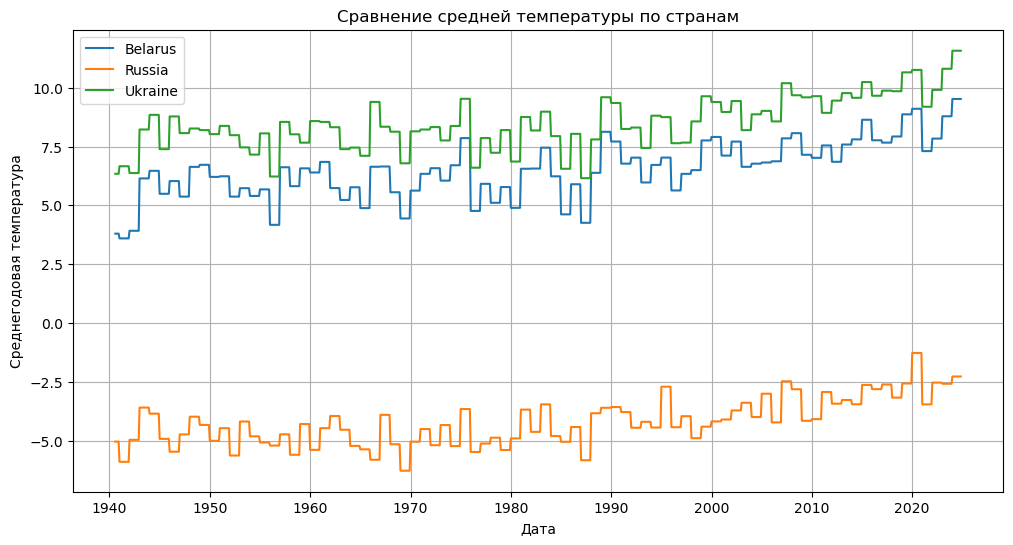

In [20]:
countries = ["Belarus", "Russia", "Ukraine"]  # Список стран для сравнения
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df.loc[df['Country'] == country].copy()
    country_data['Date'] = pd.to_datetime(country_data[['Year', 'Month']].assign(DAY=1))
    country_data = country_data.set_index('Date').sort_index()
    plt.plot(country_data['Yearly average temp'], label=country)

plt.title("Сравнение средней температуры по странам")
plt.xlabel("Дата")
plt.ylabel("Среднегодовая температура")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
!pip install tensorflow

Epoch 1/50


/home/yana/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0895
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055
Epoch 16/50
57/57 ━━━━━━━━━━━━

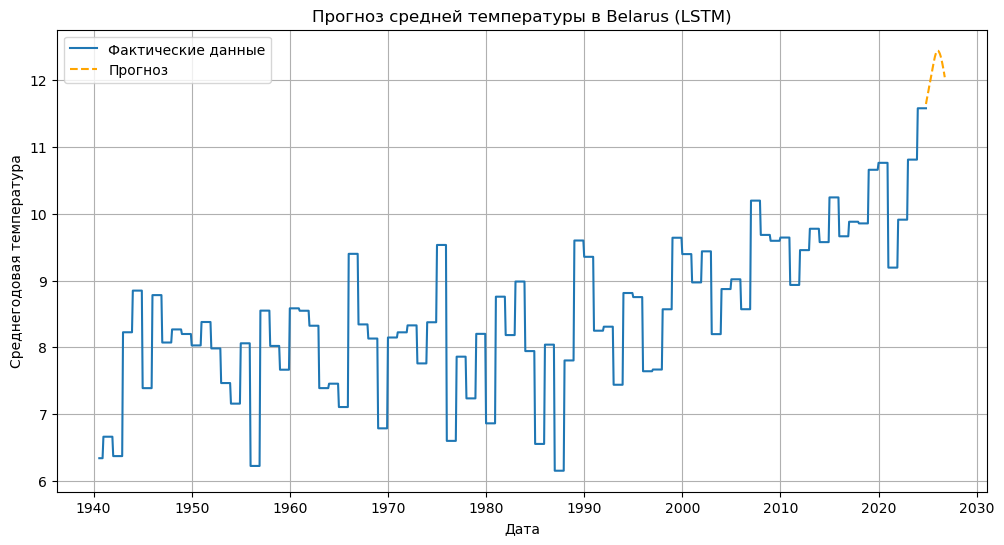

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(country_data['Yearly average temp'].values.reshape(-1, 1))

# Создание последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Длина окна (например, 12 месяцев)
X, y = create_sequences(scaled_data, seq_length)

# Разделение на обучающую и тестовую выборки
train_size = int(len(X) * 0.9)  # Используем больше данных для обучения
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Построение модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, activation='relu'))  # Второй слой LSTM
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Прогнозирование
predictions = []
input_sequence = scaled_data[-seq_length:]  # Последняя последовательность для прогноза

for _ in range(24):  # Прогноз на 24 шага вперёд
    input_sequence = input_sequence.reshape((1, seq_length, 1))
    pred = model.predict(input_sequence, verbose=0)
    predictions.append(pred[0, 0])
    pred = np.array(pred).reshape(1, 1, 1)
    input_sequence = np.append(input_sequence[:, 1:, :], pred, axis=1)

# Восстановление масштабов
forecast_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
forecast_index = pd.date_range(country_data.index[-1], periods=24, freq="MS")

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(country_data['Yearly average temp'], label="Фактические данные")
plt.plot(forecast_index, forecast_values, label="Прогноз", linestyle="--", color="orange")
plt.title(f"Прогноз средней температуры в {country_name} (LSTM)")
plt.xlabel("Дата")
plt.ylabel("Среднегодовая температура")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
!pip install prophet

16:18:28 - cmdstanpy - INFO - Chain [1] start processing
16:18:28 - cmdstanpy - INFO - Chain [1] done processing


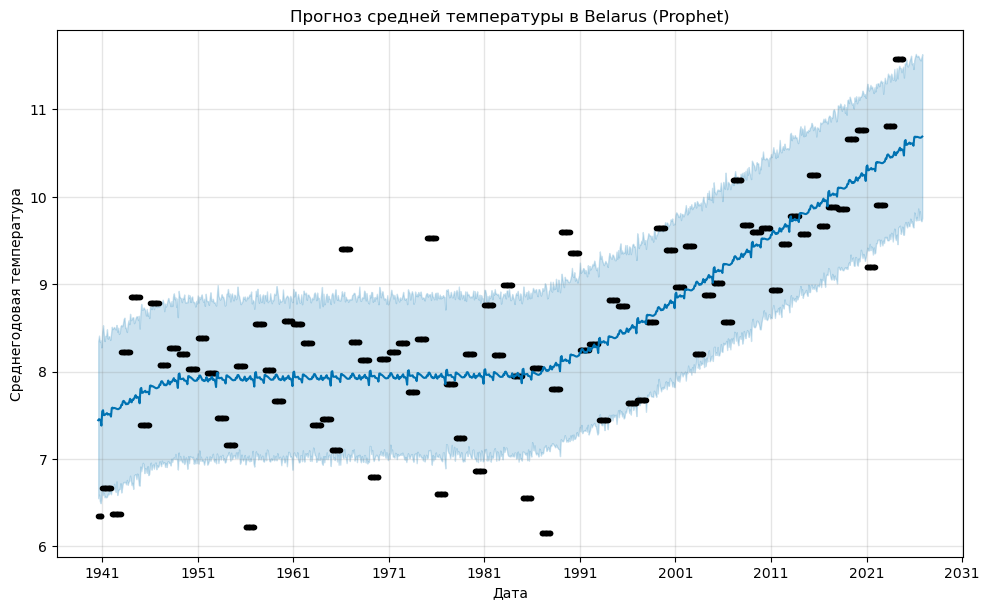

In [27]:
from prophet import Prophet

# Подготовка данных для Prophet
prophet_data = country_data.reset_index()[['Date', 'Yearly average temp']]
prophet_data.columns = ['ds', 'y']  # Требуемые названия столбцов

# Обучение модели Prophet
model = Prophet()
model.fit(prophet_data)

# Прогноз на 24 месяца вперёд
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)

# Визуализация прогноза
model.plot(forecast)
plt.title(f"Прогноз средней температуры в {country_name} (Prophet)")
plt.xlabel("Дата")
plt.ylabel("Среднегодовая температура")
plt.show()

/home/yana/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


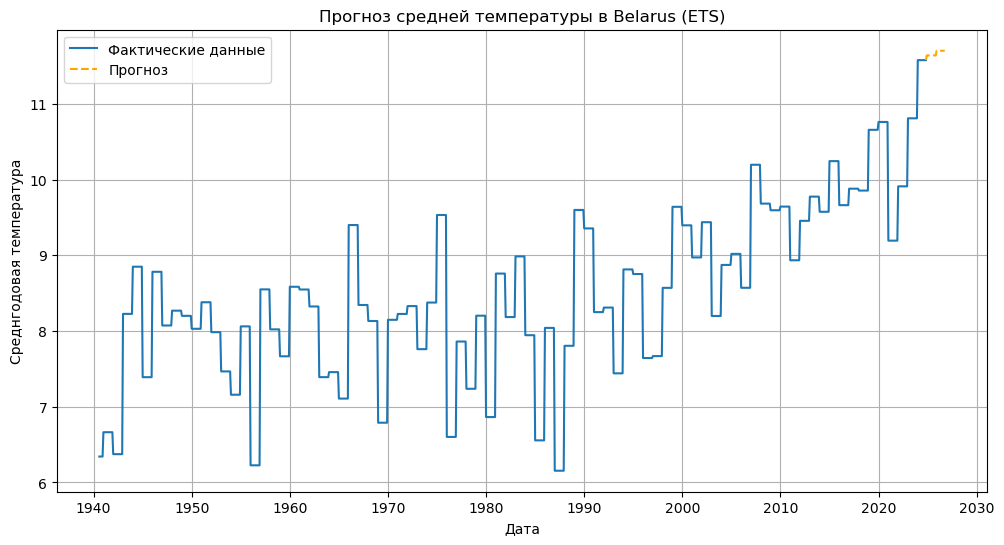

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Обучение модели ETS
model = ExponentialSmoothing(country_data['Yearly average temp'], 
                              trend="add", 
                              seasonal="add", 
                              seasonal_periods=12)
results = model.fit()

# Прогноз на 24 месяца вперёд
forecast_index = pd.date_range(country_data.index[-1], periods=24, freq="MS")
forecast_values = results.forecast(steps=24)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(country_data['Yearly average temp'], label="Фактические данные")
plt.plot(forecast_index, forecast_values, label="Прогноз", linestyle="--", color="orange")
plt.title(f"Прогноз средней температуры в {country_name} (ETS)")
plt.xlabel("Дата")
plt.ylabel("Среднгодовая температура")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0759  
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4921 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2174 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1054 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0782 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0680 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0631 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0589 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0542 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0536 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0517 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0471 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0454 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0436 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0403 
Epo

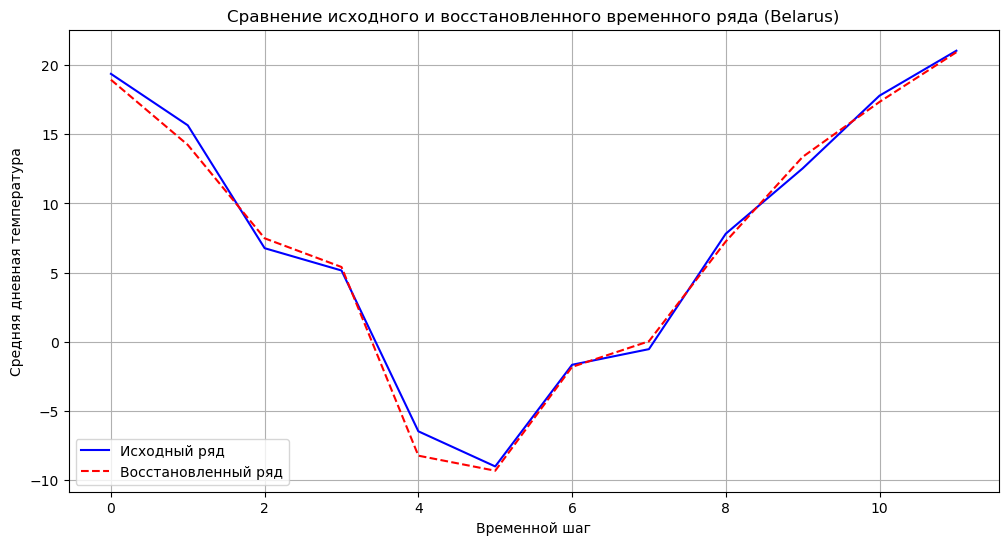

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Подготовка данных
data = country_data['Daily average temp'].values  # Берем данные о температуре
timesteps = 12  # Длина окна временного ряда (например, 12 месяцев)

# Создание последовательностей для автоэнкодера
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

X = create_sequences(data, timesteps)

# Нормализация данных
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

# Создание автоэнкодера
input_layer = Input(shape=(timesteps,))
encoded = Dense(32, activation='relu')(input_layer)  # Скрытое представление с 32 нейронами
decoded = Dense(timesteps, activation='linear')(encoded)  # Восстановление исходных данных

autoencoder = Model(input_layer, decoded)

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучение автоэнкодера
autoencoder.fit(X_normalized, X_normalized, epochs=50, batch_size=32, shuffle=True)

# Использование обученного автоэнкодера для сжатия и восстановления временных рядов
encoded_data = autoencoder.predict(X_normalized)
restored_data = encoded_data * X_std + X_mean  # Восстановим данные в исходный масштаб

# Визуализация исходных и восстановленных данных
index = 0  # Индекс временного ряда для визуализации
plt.figure(figsize=(12, 6))
plt.plot(X[index], label='Исходный ряд', color='blue')
plt.plot(restored_data[index], label='Восстановленный ряд', color='red', linestyle='--')
plt.xlabel('Временной шаг')
plt.ylabel('Средняя дневная температура')
plt.legend()
plt.grid(True)
plt.title(f"Сравнение исходного и восстановленного временного ряда ({country_name})")
plt.show()